In [4]:
import numpy as np
import sys
import gzip
import matplotlib.pyplot as plt

In [13]:
size = 25

In [57]:
num_involved = 0
sand_amount = 0
def dropSandStart(grid, x, y, k):
    global num_involved
    num_involved = 0
    grid[x][y] = grid[x][y] + 1
    global sand_amount
    sand_amount = sand_amount + 1
    if (grid[x][y] > k):
        num_involved = num_involved + 1
        grid[x][y] = grid[x][y] - 4
        if (x == 0):
            sand_amount = sand_amount - 1
        elif (x > 0):
            dropSand(grid, x-1, y, k)
        if (y == 0):
            sand_amount = sand_amount - 1
        elif (y > 0):
            dropSand(grid, x, y-1, k)
        if (x == size - 1):
            sand_amount = sand_amount - 1
        elif (x < size - 1):
            dropSand(grid, x+1, y, k)
        if (y == size - 1):
            sand_amount = sand_amount - 1
        elif (y < size - 1):
            dropSand(grid, x, y+1, k)

def dropSand(grid, x, y, k):
    grid[x][y] = grid[x][y] + 1
    global num_involved
    global sand_amount
    if (grid[x][y] > k):
        num_involved = num_involved + 1
        grid[x][y] = grid[x][y] - 4
        if (x == 0):
            sand_amount = sand_amount - 1
        elif (x > 0):
            dropSand(grid, x-1, y, k)
        if (y == 0):
            sand_amount = sand_amount - 1
        elif (y > 0):
            dropSand(grid, x, y-1, k)
        if (x == size - 1):
            sand_amount = sand_amount - 1
        elif (x < size - 1):
            dropSand(grid, x+1, y, k)
        if (y == size - 1):
            sand_amount = sand_amount - 1
        elif (y < size - 1):
            dropSand(grid, x, y+1, k)
            
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.5, 24.5, 24.5, -0.5)

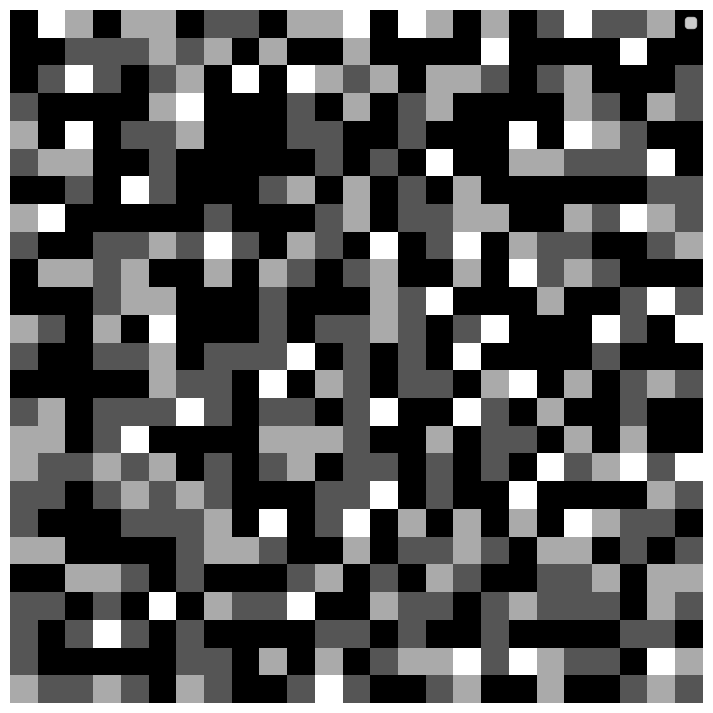

In [58]:
state = np.zeros((size, size))
runs = 10000
store_sand_amounts = []
store_avalanche_sizes = []
x = np.random.randint(0, size-1, runs)
y = np.random.randint(0, size-1, runs)
for i in range(runs):
    dropSandStart(state, x[i], y[i], 3)
    store_sand_amounts.append(sand_amount)
    store_avalanche_sizes.append(num_involved)
# for i in range(100):
#     dropSand(state, (int)(size/2), (int)(size/2), 3)

plt.rcParams['image.cmap'] = 'binary'
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(state)
ax.legend()
ax.axis(False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Text(0, 0.5, 'Avalanche Size (window averaged)')

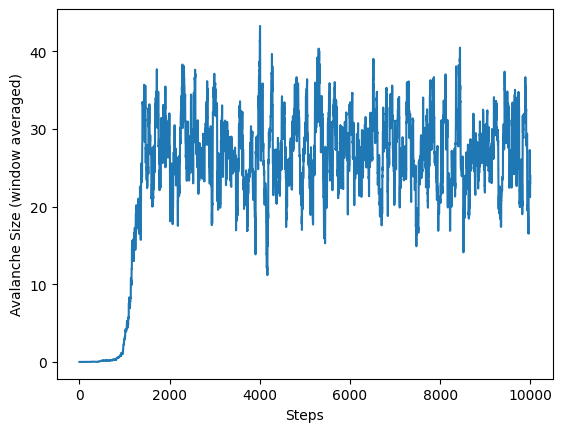

In [59]:
store_avalanche_averages = []
store_sand_amount_averages = []
for i in range(runs - 100):
    avalanche_average = np.sum(store_avalanche_sizes[i:i+100]) / 100
    store_avalanche_averages.append(avalanche_average)
    num_average = np.sum(store_sand_amounts[i:i+100]) / 100
    store_sand_amount_averages.append(num_average)
    

plt.plot(np.linspace(start= 0, stop=10000, num=10000-100), store_avalanche_averages)
print(store_avalanche_sizes)
plt.xlabel("Steps")
plt.ylabel("Avalanche Size (window averaged)")

Text(0, 0.5, 'Number of sand on table')

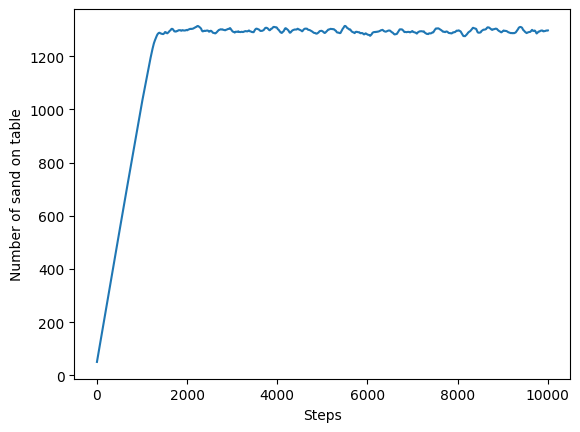

In [60]:
plt.plot(np.linspace(start= 0, stop=10000, num=10000-100), store_sand_amount_averages)
plt.xlabel("Steps")
plt.ylabel("Number of sand on table")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224,

Text(0.5, 1.0, 'slope is -1.0011617739394783')

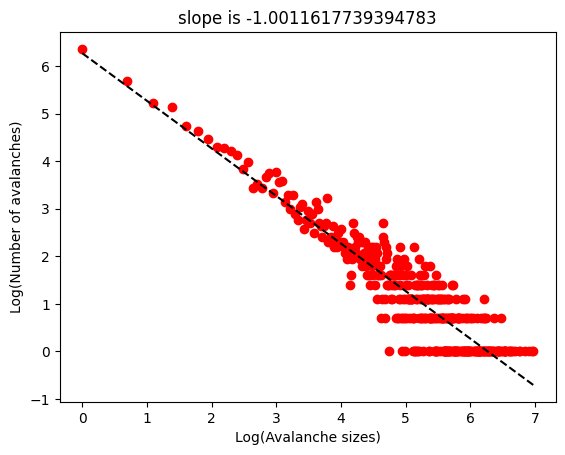

In [75]:
pts = dict()
for avalSize in store_avalanche_sizes:
    if avalSize not in pts:
        pts[avalSize] = 1
    else:
        pts[avalSize] += 1

kys = list(pts.keys())
kys.sort()
print(kys)


values = [pts[ky] for ky in kys]
del(kys[0])
del(values[0])
x = np.log(kys)
y = np.log(values)

# x = [np.log(ky) for ky in kys]
# y = [np.log(chi) for chi in values]

coef = np.polyfit(x, y, 1)
linreg = np.poly1d(coef)

print(values)
plt.plot(x, y, 'ro', x, linreg(x), '--k')
plt.xlabel("Log(Avalanche sizes)")
plt.ylabel("Log(Number of avalanches)")
plt.title("slope is " + str(coef[0]))

In [80]:
involved_state = np.zeros((size, size))
def SpecialDropSand(grid, x, y, k):
    grid[x][y] = grid[x][y] + 1
    involved_state[x][y] = 1
    if (grid[x][y] > k):
        grid[x][y] = grid[x][y] - 4
        if (x > 0):
            SpecialDropSand(grid, x-1, y, k)
        if (y > 0):
            SpecialDropSand(grid, x, y-1, k)
        if (x < size - 1):
            SpecialDropSand(grid, x+1, y, k)
        if (y < size - 1):
            SpecialDropSand(grid, x, y+1, k)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.5, 24.5, 24.5, -0.5)

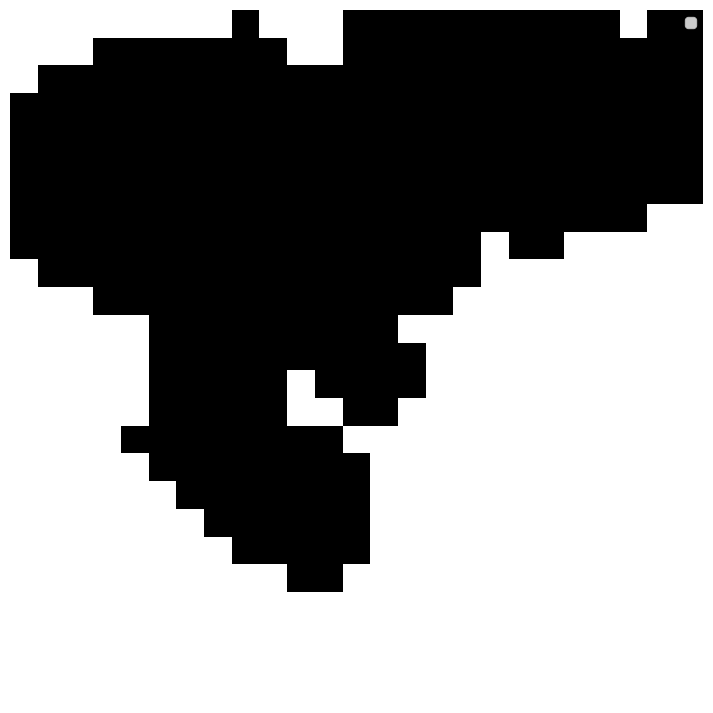

In [87]:
SpecialDropSand(state, 6, 6, 3)
plt.rcParams['image.cmap'] = 'binary'
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(involved_state)
ax.legend()
ax.axis(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.5, 199.5, 199.5, -0.5)

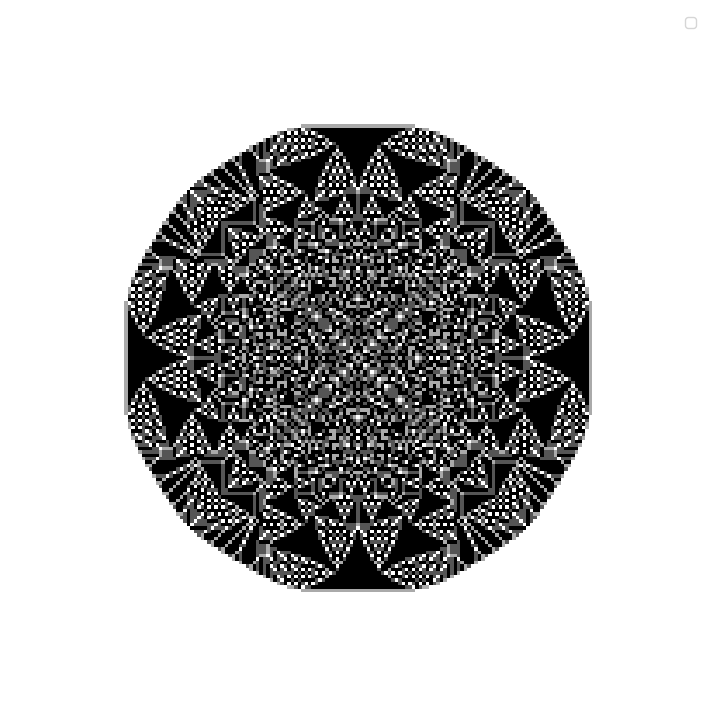

In [90]:
size = 200
state = np.zeros((size, size))
runs = 32767

for i in range(runs):
    dropSand(state, (int)(size/2), (int)(size/2), 3)

plt.rcParams['image.cmap'] = 'binary'
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(state)
ax.legend()
ax.axis(False)